In [28]:
import tensorflow as tf 
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [15]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Removing Unwantend Imgaes

In [17]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [18]:
data = 'data'
image_exts = ['jpeg','jpg','bmp','png']

In [19]:
os.listdir(os.path.join(data , 'happy'))

['images31.jpg',
 'image15.jpeg',
 'images9.jpg',
 'o-HAPPY-facebook.jpg',
 'images6.jpg',
 'hqdefault.jpg',
 'image32.png',
 '8cxKy5g9i.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'image30.jpeg',
 '1-2.jpg',
 'images34.jpg',
 'happinessa.jpg',
 'images2.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 'happy-person.jpeg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'images7.jpg',
 'images12.jpg',
 'image31.jpeg',
 'happy-people-vector-29209040.jpg',
 'image16.jpeg',
 'image4.jpeg',
 '11-Habits-of-Truly-Happy-People.jpg',
 'images27.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'the-habits-of-happy-people-a-meditation-day-course-611337.jpg',
 'images19.jpg',
 'happy-people-14410042.jpg',
 'images.jpg',
 'maxresdefault2.jpg',
 'images25.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'images13.jpg',
 'Top-Secrets-of-How-to-be-Happy.jpg',
 'happy-people-black-and-white-720x360.jpg',
 'image10.jpeg',
 'goup-happy-people-group-jumping-isolate

In [20]:
os.listdir(os.path.join(data , 'sad'))

['images31.jpg',
 'getty_501650894_118886.jpg',
 'image15.jpeg',
 'images9.jpg',
 'images51.jpg',
 'image-20160914-4963-19knfh1.jpg',
 'images6.jpg',
 'vh6to.jpg',
 'fTw5aVC5_400x400.jpg',
 'image32.png',
 'sad-people-icon-2CCHXB2.jpg',
 'sad-woman.jpg',
 'person-super-depressed.jpg',
 'Crying-girl.jpg',
 'sad-people-vector-26812552.jpg',
 'images34.jpg',
 'images2.jpg',
 '51079685_M.jpg',
 '6-Best-and-worst-things-to-say.jpg',
 'sad-people.jpg',
 'images7.jpg',
 'images12.jpg',
 'images46.jpg',
 'images38.jpg',
 'DD-blogpost-SAD-940x492.png',
 'images41.jpg',
 'image16.jpeg',
 'sad-person-concept-vector-26538685.jpg',
 'Depressed-woman-covering-her-eyes.jpg',
 'image4.jpeg',
 'images27.jpg',
 'images40.jpg',
 'images19.jpg',
 'images.jpg',
 'sad-human-figure-depression-concept-drawing-frank-ramspott.jpg',
 'maxresdefault2.jpg',
 'images25.jpg',
 'images13.jpg',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 'sad-talks-for-sad-people-fb13.png',
 'images50.jpg

In [21]:
img33 = cv2.imread(os.path.join(data , 'happy' , 'images33.jpg'))

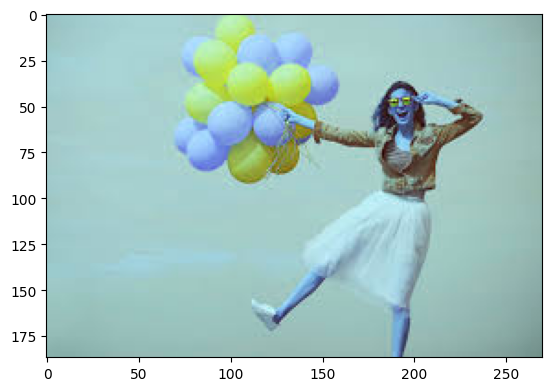

In [22]:
plt.imshow(img33)
plt.show()

In [23]:
#script for removing unwanted imgages

for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


## Loading Dataset

In [24]:
import numpy as np

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

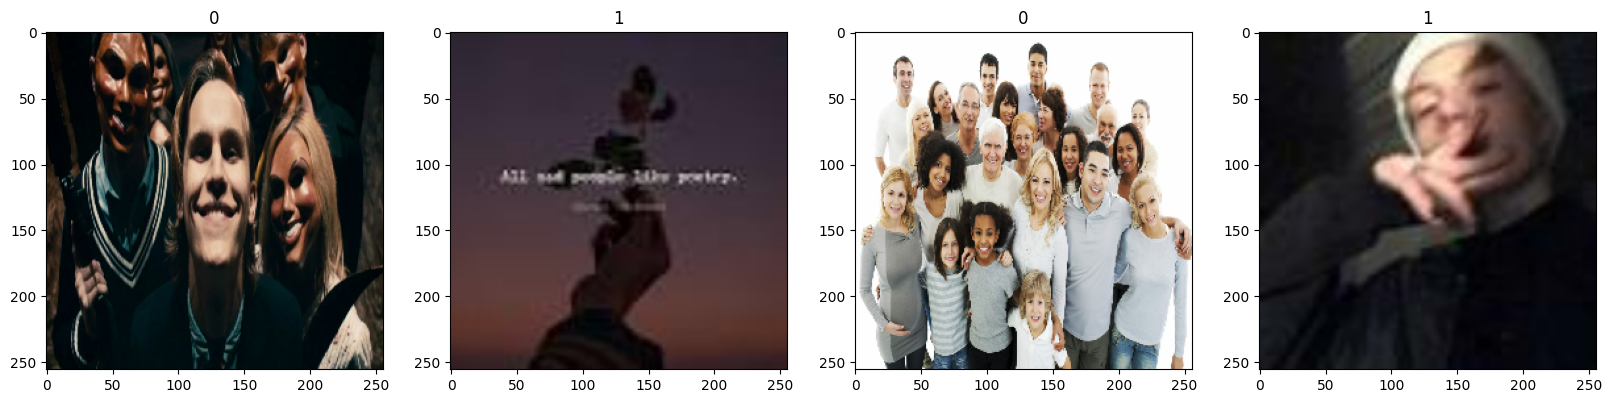

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])